## 主成分分析
> **求出第一主成分以后，如何求出下一个主成分？**

<img src='./picture/4-1.png' style='float:middle'>

<img src='./picture/4-2.png' style='float:middle'>

## 获得前n个主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

In [3]:
def demean(X): #数据减去平均值，使计算更加容易
    return X - np.mean(X, axis=0) #求出每一列的均值
X = demean(X)

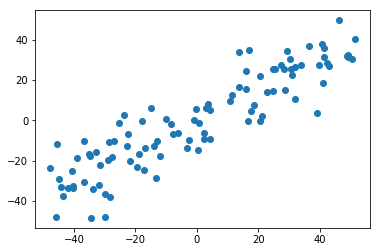

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [5]:
def f(w, X): #目标函数
    return np.sum((X.dot(w)**2)) / len(X) 
def df(w, X): #求梯度
    return X.T.dot(X.dot(w)) * 2. / len(X)
def direction(w): #将w化为单位向量
    return w / np.linalg.norm(w) #调用norm函数求出w的模
def first_component( X, initial_w, eta,n_iters = 1e4 ,epsilon=1e-10): #求出第一主成分   
    w = direction(initial_w)
    i_iter = 0    
    while i_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) #注意1：每次求一个单位向量
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break            
        i_iter += 1        
    return w

In [6]:
initial_w = np.random.random(X.shape[1]) #w初始值不能为0向量
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.78567139, 0.61864405])

---
**求出第二主成分**

In [7]:
X2 = np.empty(X.shape)
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w) * w
    
#也可以进行向量化 X2 = X - X.dot(w).reshape(-1.1) * w

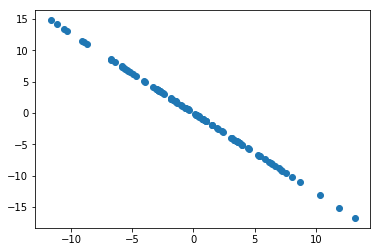

In [8]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [9]:
w2 = first_component(X2, initial_w, eta) #寻找第二个主成分
w2

array([-0.61864383,  0.78567157])

In [10]:
w.dot(w2) # 两个方向垂直

2.8752416258992497e-07

---
**拓展到多维空间，获取前n个主成分**

In [13]:
def first_n_components(n, X, eta=0.01, n_iters=1e4, epsilon=1e-8): ##将寻找到的主成分保存到res列表中
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)       
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * 2  ##获得出去主成分的点，可以继续需要主成分
        
    return res
        

In [14]:
a = first_n_components(2, X)
print(a)

[array([0.7856714 , 0.61864404]), array([0.65827543, 0.75277716])]
